# 1. Database preparation

## 1.1. Import data

In [1]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="covid19",
    user="covid19",
    password="aluno")

# Open a cursor to perform database operations
cur = conn.cursor()

# Execute a query
cur.execute("select * from agrega_bd")

# Retrieve query results
records = cur.fetchall()
records

[('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Anti-HCV',
  'não reagente'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Volume plaquetário médio',
  '11,8'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Reticulócitos %',
  '1,20'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'C. Cetônicos, urina',
  'negativa'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Urobilinogênio, urina',
  'inferior a 1,0 mg/dL'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Células Epiteliais, urina',
  'raríssimas'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'DHL',
  '531'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  

## 1.2. Prepare dataframe

In [2]:
import pandas as pd

df = pd.DataFrame(records, columns=["id_paciente", "ic_sexo", "idade", "cd_pais", "cd_uf", "cd_municipio", "de_hospital", "de_analito", "de_resultado"])

df_piv = pd.pivot_table(df, index=["id_paciente", "ic_sexo", "idade", "cd_pais", "cd_uf", "cd_municipio", "de_hospital"], columns=["de_analito"], values=["de_resultado"] , aggfunc='first')

df_final = pd.DataFrame(df_piv.to_records())

df_final.columns = [hdr.replace("(", "") \
                     for hdr in df_final.columns]
df_final.columns = [hdr.replace(")", "") \
                     for hdr in df_final.columns]
df_final.columns = [hdr.replace("'de_resultado', '", "") \
                     for hdr in df_final.columns]
df_final.columns = [hdr.replace("'", "") \
                     for hdr in df_final.columns]

# y = df_final.loc[:, 'test_covid']
# x = df_final.pop("test_covid")


# df
# df[df['de_analito'] == 'test_covid']
df_final


,id_paciente,ic_sexo,idade,cd_pais,cd_uf,cd_municipio,de_hospital,17-Alfa-Hidroxiprog.,183,25OH-Vitamina D Total,...,pO2 arterial,pO2 venoso,test_covid,v.Willebrand,Ácid Vanil-Mandélico,Ácido Valpróico,"Ácido ascorbico, plasma",Ácido fólico,Ácido Úrico,Índice de Green & King
0,003F1F4C194763E4A00FD809AF5FA6AA,M,64.0,BR,SP,MMMM,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,004372C1AFDA409721664680D566584C,M,30.0,BR,SP,SAO PAULO,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,007D8341B5ACFE2638807598AD434475,M,50.0,BR,UU,MMMM,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,008F7C768687F4DCE9792FF0BAE0F003,F,31.0,BR,SP,SAO PAULO,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0098C8322E8D107EA05D9213EDBFACED,M,27.0,BR,SP,MMMM,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,FFADAAB51D84E2D58387DFB5876B43E2,F,28.0,BR,SP,SAO PAULO,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2982,FFC81F516A0F4B0EB0EB5A1B444BD467,F,40.0,XX,UU,SAO PAULO,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2983,FFE3509C7443598B1C44FEC8C536B52B,M,47.0,BR,SP,SAO PAULO,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2984,FFEC3898BAA04751EB00C108270B8F7E,M,38.0,BR,DF,BRASILIA,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2.1. Remove non expressive categories

In [3]:
from copy import deepcopy

df_temp_full = deepcopy(df_final)

df_final = df_final[df_final.test_covid != 'INDETECTÁVEL']
df_final = df_final[df_final.test_covid != 'DETECTÁVEL']
df_final = df_final[df_final.test_covid != 'INCONCLUSIVO']
df_final = df_final[df_final.test_covid != 'Inconclusivo ']
# df_final = df_final[df_final.columns != 'id_paciente']
df_final = df_final.loc[:, df_final.columns != 'id_paciente']
# y_true.unique()

### 1.2.2. Preparing categorical data

In [4]:
from copy import deepcopy

df_temp = deepcopy(df_final)

categorical_columns = df_final.select_dtypes('object').columns

for col in categorical_columns:
    df_final[col] = pd.Categorical(df_final[col]).codes

df_final

,ic_sexo,idade,cd_pais,cd_uf,cd_municipio,de_hospital,17-Alfa-Hidroxiprog.,183,25OH-Vitamina D Total,ACTH,...,pO2 arterial,pO2 venoso,test_covid,v.Willebrand,Ácid Vanil-Mandélico,Ácido Valpróico,"Ácido ascorbico, plasma",Ácido fólico,Ácido Úrico,Índice de Green & King
0,1,64.0,0,12,3,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
1,1,30.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
2,1,50.0,0,13,3,0,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,0,31.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
4,1,27.0,0,12,3,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,0,28.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2982,0,40.0,1,13,4,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
2983,1,47.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
2984,1,38.0,0,2,0,0,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1


In [5]:
from copy import copy
new_df = copy(df_final)

y = new_df.loc[:, 'test_covid'].values.reshape(-1, 1)
x = new_df.loc[:, df_final.columns != 'test_covid']




In [6]:
from copy import copy
new_df = copy(df_final)

y = new_df.loc[:, 'test_covid'].values.reshape(-1, 1)
x = new_df.loc[:, df_final.columns != 'test_covid']

import numpy as np

y_true = df_temp.loc[:, 'test_covid']
y_code = new_df.loc[:, 'test_covid']


classes_temp = [y_code.values.tolist(), y_true.values.tolist()]

classes = np.unique(np.array(classes_temp).T, axis=0).T

classes

array([['0', '1', '2', '3'],
       ['DETECTADO', 'DETECTADO (POSITIVO)', 'NÃO DETECTADO',
        'NÃO DETECTADO (NEGATIVO)']], dtype='<U24')

# 2. Exploratory analysis

## 2.1. Shape of the classes

[1322 1375   55    4    4    1  119  106]


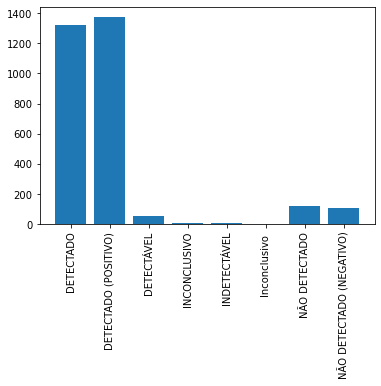

In [7]:
import matplotlib.pyplot as plt

y_true_full = df_temp_full.loc[:, 'test_covid']

labels, counts = np.unique(y_true_full, return_counts=True)

print(counts)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xticks(rotation = 90) 
plt.show()

[1322 1375  119  106]


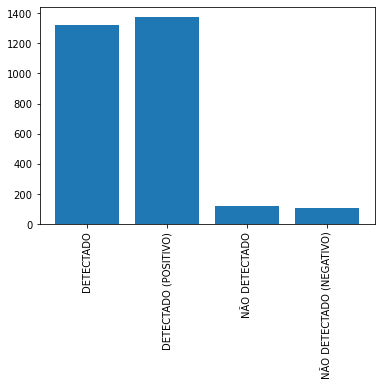

In [8]:
import matplotlib.pyplot as plt
labels, counts = np.unique(y_true, return_counts=True)

print(counts)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xticks(rotation = 90) 
plt.show()

In [9]:
from pandas.core.algorithms import value_counts
from scipy.stats import entropy

entropies = []
for col in new_df.columns:

    counts = df_final[col].value_counts()
    entropies.append(entropy(counts))


entropies

[0.6927139997578466,
 3.9824882673939377,
 0.15480050576913845,
 0.8226261406126273,
 0.8369609312757653,
 0.0,
 0.006146256867114289,
 0.5979035482807361,
 0.4126442707673277,
 0.024582213322106937,
 1.6718705750443499,
 0.01568336331508737,
 0.025577656441008508,
 1.5171384281614513,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.06490526519256704,
 0.1117888801856187,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.35241798662411844,
 0.08586193169255654,
 0.01536476304844649,
 0.012292044924125634,
 0.003073187014754522,
 0.06119123595745102,
 0.003073187014754522,
 0.030726593019107778,
 0.012292044924125634,
 0.04253950840741552,
 0.05482497420506985,
 0.01568336331508737,
 0.021509847287685187,
 0.01684818710856568,
 0.003073187014754522,
 0.10481420

In [10]:
entrop = dict(zip(new_df.columns, entropies)) 
entrop

{'ic_sexo': 0.6927139997578466,
 'idade': 3.9824882673939377,
 'cd_pais': 0.15480050576913845,
 'cd_uf': 0.8226261406126273,
 'cd_municipio': 0.8369609312757653,
 'de_hospital': 0.0,
 '17-Alfa-Hidroxiprog.': 0.006146256867114289,
 '183': 0.5979035482807361,
 '25OH-Vitamina D Total': 0.4126442707673277,
 'ACTH': 0.024582213322106937,
 'ALT TGP': 1.6718705750443499,
 'ANCA': 0.01568336331508737,
 'ANTI-Xa, atividade': 0.025577656441008508,
 'AST TGO': 1.5171384281614513,
 'Adenovirus, determinação quantitativa DNA': 0.003073187014754522,
 'Adenovírus': 0.003073187014754522,
 'Adrenalina, urina': 0.003073187014754522,
 'Adrenalina, urina isolada': 0.003073187014754522,
 'AgHBe': 0.06490526519256704,
 'AgHBs': 0.1117888801856187,
 'Agreg Plaq - Lag time- Colágeno 1,0 microg/mL': 0.003073187014754522,
 'Agreg Plaq - Lag time- Colágeno 5,0 microg/mL': 0.003073187014754522,
 'Agreg Plaq - Máx -Ác Aracdônico 500 microg/mL': 0.003073187014754522,
 'Agreg Plaq - Máxima - Adrenalina 2,0 microM': 

In [11]:
import operator

sorted_x = sorted(entrop.items(), key=operator.itemgetter(1), reverse=True)

first_ten = sorted_x[:300]
columns_use = np.array(first_ten).T[0]

y = new_df.loc[:, 'test_covid'].values.reshape(-1, 1)
new_df = new_df[columns_use]
x = new_df.loc[:, new_df.columns != 'test_covid']

# 3. Decision tree classifier

## 3.1. With entropy

In [12]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

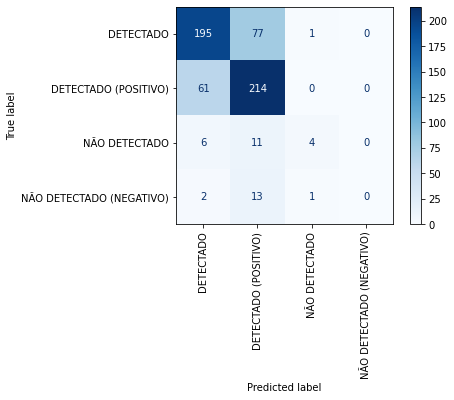

In [13]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=classes[1],
                                 cmap=plt.cm.Blues,
                                 xticks_rotation='vertical')
plt.show()


In [14]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=classes[1]))


Accuracy: 0.71

Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.52
Macro Recall: 0.42
Macro F1-score: 0.44

Weighted Precision: 0.69
Weighted Recall: 0.71
Weighted F1-score: 0.69

Classification Report

                          precision    recall  f1-score   support

               DETECTADO       0.74      0.71      0.73       273
    DETECTADO (POSITIVO)       0.68      0.78      0.73       275
           NÃO DETECTADO       0.67      0.19      0.30        21
NÃO DETECTADO (NEGATIVO)       0.00      0.00      0.00        16

                accuracy                           0.71       585
               macro avg       0.52      0.42      0.44       585
            weighted avg       0.69      0.71      0.69       585



/home/aluno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aluno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

## 3.2. Without entropy

In [16]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

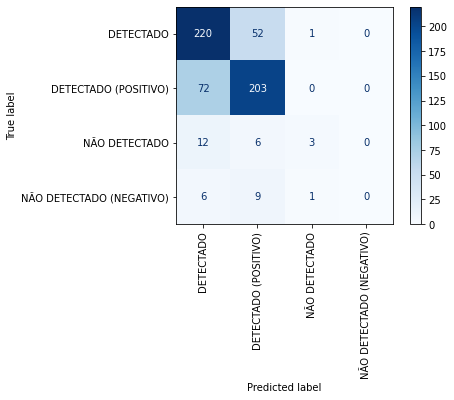

In [17]:

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=classes[1],
                                 cmap=plt.cm.Blues,
                                 xticks_rotation='vertical')
plt.show()


In [18]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=classes[1]))


Accuracy: 0.73

Micro Precision: 0.73
Micro Recall: 0.73
Micro F1-score: 0.73

Macro Precision: 0.52
Macro Recall: 0.42
Macro F1-score: 0.43

Weighted Precision: 0.71
Weighted Recall: 0.73
Weighted F1-score: 0.71

Classification Report

                          precision    recall  f1-score   support

               DETECTADO       0.71      0.81      0.75       273
    DETECTADO (POSITIVO)       0.75      0.74      0.74       275
           NÃO DETECTADO       0.60      0.14      0.23        21
NÃO DETECTADO (NEGATIVO)       0.00      0.00      0.00        16

                accuracy                           0.73       585
               macro avg       0.52      0.42      0.43       585
            weighted avg       0.71      0.73      0.71       585



/home/aluno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aluno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3.3. Simplify the problem for two classes

In [48]:
new_df_simp = deepcopy(new_df)

new_df_simp[new_df_simp.test_covid==1] = 0
new_df_simp[new_df_simp.test_covid==3] = 2

[2697  225]


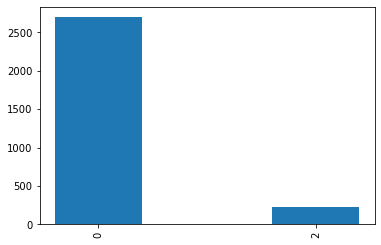

In [49]:
from copy import copy
new_df = copy(df_final)

y = new_df_simp.loc[:, 'test_covid'].values.reshape(-1, 1)
x = new_df_simp.loc[:, new_df_simp.columns != 'test_covid']

import numpy as np

y_code = new_df_simp.loc[:, 'test_covid']


# classes_temp = [y_code.values.tolist(), y_true.values.tolist()]

# classes = np.unique(np.array(classes_temp).T, axis=0).T

classes

import matplotlib.pyplot as plt
labels, counts = np.unique(y_code, return_counts=True)

print(counts)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xticks(rotation = 90) 
plt.show()

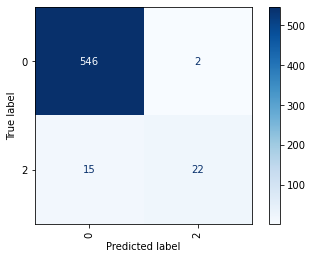

In [59]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(clf, x_test, y_test,
#                                  display_labels=classes[1],
                                 cmap=plt.cm.Blues,
                                 xticks_rotation='vertical')
plt.show()


In [60]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['DETECTADO', "NÃO DETECTADO"]))


Accuracy: 0.97

Micro Precision: 0.97
Micro Recall: 0.97
Micro F1-score: 0.97

Macro Precision: 0.94
Macro Recall: 0.80
Macro F1-score: 0.85

Weighted Precision: 0.97
Weighted Recall: 0.97
Weighted F1-score: 0.97

Classification Report

               precision    recall  f1-score   support

    DETECTADO       0.97      1.00      0.98       548
NÃO DETECTADO       0.92      0.59      0.72        37

     accuracy                           0.97       585
    macro avg       0.94      0.80      0.85       585
 weighted avg       0.97      0.97      0.97       585



# 4. Undersampling

In [19]:
from sklearn.utils import resample

# # setting up testing and training sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

# # concatenate our training data back together
# df = pd.concat([x_train, y_train], axis=1)

labels, counts

# for label in labels:
df_final_detect    = df_final[df_final.test_covid==0]
df_final_detect_p  = df_final[df_final.test_covid==1]
df_final_not       = df_final[df_final.test_covid==2]
df_final_not_n     = df_final[df_final.test_covid==3]


 
# Downsample majority class
df_detected_p_downsampled = resample(df_final_detect_p, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_final_not_n))  # to match minority class
#                                  random_state=1234) # reproducible results

df_detected_downsampled = resample(df_final_detect, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_final_not_n))  # to match minority class

df_not_downsampled = resample(df_final_not, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_final_not_n))  # to match minority class

 
# # Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_detected_p_downsampled, df_detected_downsampled, df_not_downsampled, df_final_not_n])

df_final_detect
# df_downsampled.balance.value_counts()

# # 1    200
# # 0    200

,ic_sexo,idade,cd_pais,cd_uf,cd_municipio,de_hospital,17-Alfa-Hidroxiprog.,183,25OH-Vitamina D Total,ACTH,...,pO2 arterial,pO2 venoso,test_covid,v.Willebrand,Ácid Vanil-Mandélico,Ácido Valpróico,"Ácido ascorbico, plasma",Ácido fólico,Ácido Úrico,Índice de Green & King
0,1,64.0,0,12,3,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
1,1,30.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
4,1,27.0,0,12,3,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
9,0,36.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
16,1,61.0,0,12,3,0,-1,-1,-1,-1,...,-1,20,0,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,1,56.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
2978,1,36.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
2980,1,67.0,0,12,3,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
2982,0,40.0,1,13,4,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1


In [20]:
from copy import copy
new_df = copy(df_final)

y = df_downsampled.loc[:, 'test_covid'].values.reshape(-1, 1)
x = df_downsampled.loc[:, df_downsampled.columns != 'test_covid']

import numpy as np

y_code = df_downsampled.loc[:, 'test_covid']


# classes_temp = [y_code.values.tolist(), y_true.values.tolist()]

# classes = np.unique(np.array(classes_temp).T, axis=0).T

classes

array([['0', '1', '2', '3'],
       ['DETECTADO', 'DETECTADO (POSITIVO)', 'NÃO DETECTADO',
        'NÃO DETECTADO (NEGATIVO)']], dtype='<U24')

[106 106 106 106]


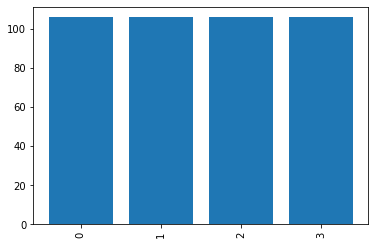

In [21]:

import matplotlib.pyplot as plt
labels, counts = np.unique(y_code, return_counts=True)

print(counts)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xticks(rotation = 90) 
plt.show()

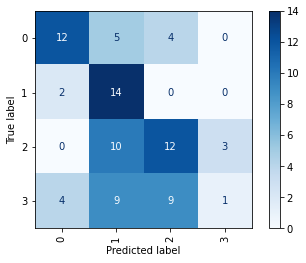

In [22]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(clf, x_test, y_test,
#                                  display_labels=classes[1],
                                 cmap=plt.cm.Blues,
                                 xticks_rotation='vertical')
plt.show()


In [23]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=classes[1]))


Accuracy: 0.46

Micro Precision: 0.46
Micro Recall: 0.46
Micro F1-score: 0.46

Macro Precision: 0.44
Macro Recall: 0.49
Macro F1-score: 0.42

Weighted Precision: 0.44
Weighted Recall: 0.46
Weighted F1-score: 0.41

Classification Report

                          precision    recall  f1-score   support

               DETECTADO       0.67      0.57      0.62        21
    DETECTADO (POSITIVO)       0.37      0.88      0.52        16
           NÃO DETECTADO       0.48      0.48      0.48        25
NÃO DETECTADO (NEGATIVO)       0.25      0.04      0.07        23

                accuracy                           0.46        85
               macro avg       0.44      0.49      0.42        85
            weighted avg       0.44      0.46      0.41        85



## 4.2. Simplify the problem for two classes

In [42]:
df_downsampled_simp = deepcopy(df_downsampled)

df_downsampled_simp[df_downsampled_simp.test_covid==1] = 0
df_downsampled_simp[df_downsampled_simp.test_covid==3] = 2

[212 212]


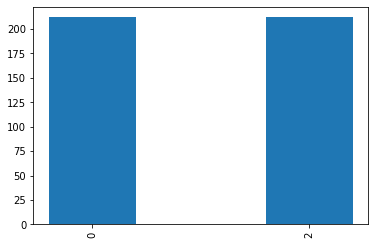

In [43]:
from copy import copy
new_df = copy(df_final)

y = df_downsampled_simp.loc[:, 'test_covid'].values.reshape(-1, 1)
x = df_downsampled_simp.loc[:, df_downsampled_simp.columns != 'test_covid']

import numpy as np

y_code = df_downsampled_simp.loc[:, 'test_covid']


# classes_temp = [y_code.values.tolist(), y_true.values.tolist()]

# classes = np.unique(np.array(classes_temp).T, axis=0).T

classes

import matplotlib.pyplot as plt
labels, counts = np.unique(y_code, return_counts=True)

print(counts)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xticks(rotation = 90) 
plt.show()

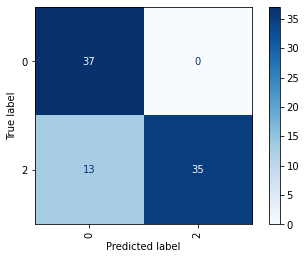

In [44]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(clf, x_test, y_test,
#                                  display_labels=classes[1],
                                 cmap=plt.cm.Blues,
                                 xticks_rotation='vertical')
plt.show()


In [46]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['DETECTADO', "NÃO DETECTADO"]))


Accuracy: 0.85

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.87
Macro Recall: 0.86
Macro F1-score: 0.85

Weighted Precision: 0.89
Weighted Recall: 0.85
Weighted F1-score: 0.85

Classification Report

               precision    recall  f1-score   support

    DETECTADO       0.74      1.00      0.85        37
NÃO DETECTADO       1.00      0.73      0.84        48

     accuracy                           0.85        85
    macro avg       0.87      0.86      0.85        85
 weighted avg       0.89      0.85      0.85        85



## 5. Oversampling

In [24]:
from sklearn.utils import resample

# # setting up testing and training sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

# # concatenate our training data back together
# df = pd.concat([x_train, y_train], axis=1)

labels, counts

# for label in labels:
df_final_detect    = df_final[df_final.test_covid==0]
df_final_detect_p  = df_final[df_final.test_covid==1]
df_final_not       = df_final[df_final.test_covid==2]
df_final_not_n     = df_final[df_final.test_covid==3]


 
# Downsample majority class
df_detected_p_oversampled = resample(df_final_not_n, 
                                 replace=True,    # sample without replacement
                                 n_samples=len(df_final_detect_p))  # to match minority class
#                                  random_state=1234) # reproducible results

df_detected_oversampled = resample(df_final_detect, 
                                 replace=True,    # sample without replacement
                                 n_samples=len(df_final_detect_p))  # to match minority class

df_not_oversampled = resample(df_final_not, 
                                 replace=True,    # sample without replacement
                                 n_samples=len(df_final_detect_p))  # to match minority class

 
# # Combine minority class with downsampled majority class
df_oversampled = pd.concat([df_detected_p_oversampled, df_detected_oversampled, df_not_oversampled, df_final_detect_p])

df_oversampled
# df_downsampled.balance.value_counts()

# # 1    200
# # 0    200

,ic_sexo,idade,cd_pais,cd_uf,cd_municipio,de_hospital,17-Alfa-Hidroxiprog.,183,25OH-Vitamina D Total,ACTH,...,pO2 arterial,pO2 venoso,test_covid,v.Willebrand,Ácid Vanil-Mandélico,Ácido Valpróico,"Ácido ascorbico, plasma",Ácido fólico,Ácido Úrico,Índice de Green & King
651,0,36.0,0,12,3,0,-1,-1,-1,-1,...,-1,-1,3,-1,-1,-1,-1,-1,-1,-1
1168,1,57.0,0,2,0,0,-1,-1,-1,-1,...,-1,-1,3,-1,-1,-1,-1,-1,-1,-1
1548,0,37.0,0,12,3,0,-1,-1,-1,-1,...,-1,-1,3,-1,-1,-1,-1,-1,-1,-1
2322,0,42.0,0,12,3,0,-1,-1,-1,-1,...,-1,-1,3,-1,-1,-1,-1,-1,-1,-1
1862,1,29.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,3,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0,44.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2979,0,38.0,0,2,0,0,-1,26,-1,-1,...,-1,29,1,-1,-1,-1,-1,-1,-1,-1
2981,0,28.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2984,1,38.0,0,2,0,0,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1


[2750 2750]


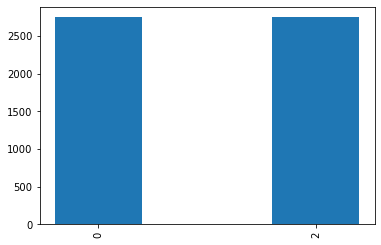

In [32]:
from copy import copy
new_df = copy(df_final)

y = df_oversampled.loc[:, 'test_covid'].values.reshape(-1, 1)
x = df_oversampled.loc[:, df_oversampled.columns != 'test_covid']

import numpy as np

y_code = df_oversampled.loc[:, 'test_covid']


# classes_temp = [y_code.values.tolist(), y_true.values.tolist()]

# classes = np.unique(np.array(classes_temp).T, axis=0).T

classes

import matplotlib.pyplot as plt
labels, counts = np.unique(y_code, return_counts=True)

print(counts)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xticks(rotation = 90) 
plt.show()

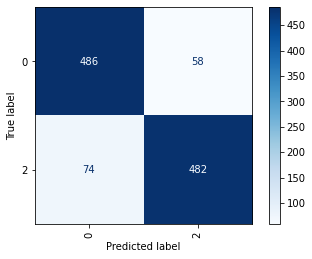

In [33]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(clf, x_test, y_test,
#                                  display_labels=classes[1],
                                 cmap=plt.cm.Blues,
                                 xticks_rotation='vertical')
plt.show()


In [47]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=classes[1]))


Accuracy: 0.85

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.87
Macro Recall: 0.86
Macro F1-score: 0.85

Weighted Precision: 0.89
Weighted Recall: 0.85
Weighted F1-score: 0.85

Classification Report



ValueError: Number of classes, 2, does not match size of target_names, 4. Try specifying the labels parameter

## 5.2. Simplify the problem for two classes

In [37]:
df_oversampled_simp = deepcopy(df_oversampled)

df_oversampled_simp[df_oversampled_simp.test_covid==1] = 0
df_oversampled_simp[df_oversampled_simp.test_covid==3] = 2

[2750 2750]


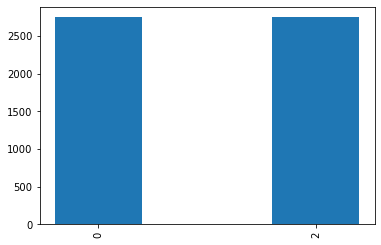

In [38]:
from copy import copy
new_df = copy(df_final)

y = df_oversampled_simp.loc[:, 'test_covid'].values.reshape(-1, 1)
x = df_oversampled_simp.loc[:, df_oversampled_simp.columns != 'test_covid']

import numpy as np

y_code = df_oversampled_simp.loc[:, 'test_covid']


# classes_temp = [y_code.values.tolist(), y_true.values.tolist()]

# classes = np.unique(np.array(classes_temp).T, axis=0).T



import matplotlib.pyplot as plt
labels, counts = np.unique(y_code, return_counts=True)

print(counts)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xticks(rotation = 90) 
plt.show()

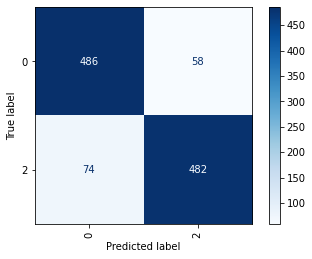

In [39]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(clf, x_test, y_test,
#                                  display_labels=classes[1],
                                 cmap=plt.cm.Blues,
                                 xticks_rotation='vertical')
plt.show()


In [41]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['DETECTADO', "NÃO DETECTADO"]))


Accuracy: 0.88

Micro Precision: 0.88
Micro Recall: 0.88
Micro F1-score: 0.88

Macro Precision: 0.88
Macro Recall: 0.88
Macro F1-score: 0.88

Weighted Precision: 0.88
Weighted Recall: 0.88
Weighted F1-score: 0.88

Classification Report

               precision    recall  f1-score   support

    DETECTADO       0.87      0.89      0.88       544
NÃO DETECTADO       0.89      0.87      0.88       556

     accuracy                           0.88      1100
    macro avg       0.88      0.88      0.88      1100
 weighted avg       0.88      0.88      0.88      1100

